# Rotational Motion
[<!-- module-mech badge --><span class="module module-mech">Mechanics</span>](module-mech) 
```{index} Rotational Motion
```

## Angular Momentum Theorem

From Newton's second law:

\\[\vec{F}=ma=m\frac{d\vec{v}}{dt}=\frac{d(m\vec{v})}{dt}\\]

The product \\(m\vec{v}\\) is called **linear momentum**, written as \\(\vec{p}\\).

Taking the cross product of both sides with the position vector \\(\vec{r}\\):

\\[\vec{r}\times\vec{F} = \vec{r}\times(\frac{d\vec{p}}{dt})\\]

The product \\(\vec{r}\times\vec{F}\\) is called the **torque**, denoted by \\(\vec{\tau}\\). From the rules of cross product, the magnitude of \\(\vec{\tau}\\) is given by:

\\[|\tau|=rF_\theta\\]

where \\(F_\theta\\) is the **tangential component** of \\(\vec{F}\\). 

The direction of \\(\vec{\tau}\\) is perpendicular to the plane formed by \\(r\\) and \\(F\\).

Therefore:

\\[\vec{\tau}=\vec{r}\times\frac{d\vec{p}}{dt}\\]

From the product rule of differentiation:

\\[\frac{d(\vec{r}\times\vec{p})}{dt}=\vec{r}\times\frac{d\vec{p}}{dt}+\frac{d\vec{r}}{dt}\times\vec{p}\\]

Since \\(\frac{d\vec{r}}{dt}=\vec{v}\\) and \\(m\vec{v}=\vec{p}\\), RHS in the equation above becomes:

\\[\vec{v}\times(m\vec{v})=m(\vec{v}\times\vec{v})=0\\]

Thus:

\\[\vec{\tau}=\frac{d(\vec{r}\times\vec{p})}{dt}\\]

The product \\(\vec{r}\times\vec{p}\\) is defined as the angular momentum \\(\vec{L}\\), and this is the **angular momentum theorem**:

\\[\vec{\tau}=\frac{d\vec{L}}{dt}\\]

## Moment of inertia

The moment of inertia of a body \\(I\\) composed of N discrete sub-bodies is defined as:

\\[I=\sum_{i=1}^{N}m_ir_i^2\\]

Where \\(m_i\\) is the mass of each sub-bodies, and \\(r_i\\) is the distance of those sub-bodies from the axis of rotation.

With this definition, the angular momentum equation reduces to:

\\[\vec{\tau}=I\frac{d^2\theta}{dt^2}\\]

where \\(\frac{d^2\theta}{dt^2}\\) represents angular acceleration.

For a continuous body, its moment of inertia \\(I\\) is defined as:

\\[I=\int r^2dm=\int\rho(r)r^2dV\\]

## Tutorial Problem 4.5

A cable is wrapped several times around a uniform, solid circular cylinder that can rotate about its axis. The cylinder has radius \\(R\\), and mass \\(m\\). The cable is pulled with a force of magnitude \\(F\\). Assuming that the cable unwinds without stretching or slipping, what will be the angular acceleration of the cylinder? 

Ignore the weight of the cable.

![](images/problem4_5.png)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from sympy import Symbol, integrate

F = Symbol('F') # force
M = Symbol('M') # mass of cylinder
R = Symbol('R') # distance from the centre of the cylinder to where the force is applied 
t = Symbol('t') # time

# x component of N = -F
# y component of N = Mg
# only F contributes to net torque
# sub into angular momentum equation
# for cylinder, I=MR**2/2

angular_acceleration = -(2*F)/(M*R)

angular_velocity = integrate(angular_acceleration, t)

angle = integrate(angular_velocity, t)

print("angular acceleration = ", angular_acceleration)

print("angular velocity = ", angular_velocity)

print("angle = ", angle)

angular acceleration =  -2*F/(M*R)
angular velocity =  -2*F*t/(M*R)
angle =  -F*t**2/(M*R)


Angular acceleration = -2.00 rad/s2


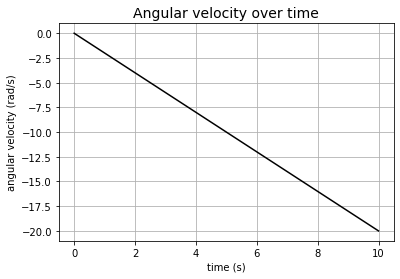

In [3]:
# substitute arbitrary numbers
F = 10 # N
M = 10 # kg
R = 1 # m

t = np.linspace(0, 10, 500) # create list of time from 0 to 10 seconds

a_a = -(2*F)/(M*R) # angular acceleration

a_v = -2 * F * t / (M * R) # angular velocity

a = -(F * t**2) / (M * R) # angle

print("Angular acceleration = %.2f rad/s2" % (a_a))

X = R * np.cos(a) # x coordinate

Y = R * np.sin(a) # y coordinate

length = R * (-a / (2 * np.pi)) # length of string 

l = np.zeros((len(t), len(t))) # store data in matrix to make animation
for i in range(len(t)):
    for j in range(i+1):
        l[i][j] = length[j]

# plot angular velocity over time

fig = plt.figure(figsize=(6,4))
plt.plot(t, a_v, 'k')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')
plt.title('Angular velocity over time', fontsize=14)
plt.grid(True)
plt.show()

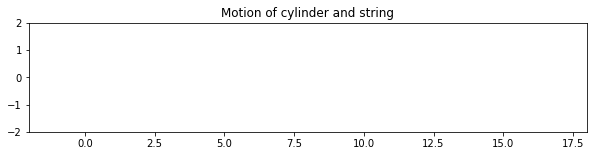

In [4]:
nframes = len(t)


# Plot background axes
fig, ax = plt.subplots(figsize=(10,2))

# plot lines
line1, = ax.plot([], [], 'ro', lw=2)
line2, = ax.plot([], [], 'k', lw=0.5)
line3, = ax.plot([], [], 'k', lw=2)


# customise axis
ax.set_xlim(-2,18)
ax.set_ylim(-2,2)
ax.set_title('Motion of cylinder and string')
    

    
lines = [line1, line2, line3]

# Plot background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Set what data to plot in each frame
def animate(i):
    
    x1 = X[i]
    y1 = Y[i]
    lines[0].set_data(x1, y1)
    
    x2 = X
    y2 = Y
    lines[1].set_data(x2, y2)
    
    x3 = l[i]
    y3 = 1
    lines[2].set_data(x3, y3)
    
    return lines

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, blit=True)

In [5]:
HTML(anim.to_html5_video())

### References

Course notes from Lecture 4 of the module ESE 95011 Mechanics